In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
# Check the Python version
import sys
if sys.version.startswith("3."):
  print("You are running Python 3. Good job :)")
else:
  print("This notebook requires Python 3.\nIf you are using Google Colab, go to Runtime > Change runtime type and choose Python 3.")

You are running Python 3. Good job :)


In [3]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
if IN_COLAB:
  # Clone the entire repo to access the files.
  !git clone -l -s https://github.com/epfml/OptML_course.git cloned-repo
  %cd cloned-repo/labs/ex02/template/

# Load the data

In [4]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
b, A = build_model_data(x, weight)

In [5]:
print('Number of samples n = ', b.shape[0])
print('Dimension of each sample d = ', A.shape[1])

Number of samples n =  10000
Dimension of each sample d =  2


# Least Squares Estimation
Least squares estimation is one of the fundamental machine learning algorithms. Given an $ n \times d $ matrix $A$ and a $ n \times 1$ vector $b$, the goal is to find a vector $x \in \mathbb{R}^d$ which minimizes the objective function $$f(x) = \frac{1}{2n} \sum_{i=1}^{n} (a_i^\top x - b_i)^2 = \frac{1}{2n} \|Ax - b\|^2 $$

In this exercise, we will try to fit $x$ using Least Squares Estimation.

One can see the function is $L$ smooth with $L =\frac1n\|A^T A\|  = \frac1n\|A\|^2$ (Lemma 2.3 for the first equality, and a few manipulations for the second).

# Computing the Objective Function
Fill in the `calculate_objective` function below:

In [6]:
def calculate_objective(Axmb):
    """Calculate the mean squared error for vector Axmb = Ax - b."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    return 1/2*np.mean(Axmb**2)
    
    # TODO: compute mean squared error
    # ***************************************************
    # raise NotImplementedError

# Compute smoothness constant $L$

To compute the spectral norm of A you can use np.linalg.norm(A, 2)

In [7]:
def calculate_L(b, A):
    """Calculate the smoothness constant for f"""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute ||A.T*A||
    L = np.linalg.norm(A.T @ A, 2)
    L = L / len(b)
    # ***************************************************
    # raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute L = smoothness constant of f
    # ***************************************************
    # raise NotImplementedError
    return L

# Gradient Descent

Please fill in the functions `compute_gradient` below:

In [8]:
def compute_gradient(b, A, x):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and objective
    Axmb = A @ x - b
    grad = A.T @ Axmb
    grad = grad / len(b)
    
    # ***************************************************
    # raise NotImplementedError
    return grad, Axmb

Please fill in the functions `gradient_descent` below:

In [9]:
def gradient_descent(b, A, initial_x, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store x and objective func. values
    xs = [initial_x]
    objectives = []
    x = initial_x
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and objective function
        # ***************************************************
        # raise NotImplementedError
        grad, obj = compute_gradient(b, A, x)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update x by a gradient descent step
        # ***************************************************
        # raise NotImplementedError
        x = x - gamma * grad
        # store x and objective function value
        xs.append(x)
        objectives.append(obj)
        print("Gradient Descent({bi}/{ti}): objective={l}".format(
              bi=n_iter, ti=max_iters - 1, l=obj))

    return objectives, xs

Test your gradient descent function with a naive step size through gradient descent demo shown below:

In [10]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50

gamma = 0.1

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_objectives_naive, gradient_xs_naive = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): objective=[-109.81967768  -73.68895452  -96.58434842 ...  -58.32779473  -74.38901745
  -51.59669261]
Gradient Descent(1/49): objective=[-99.8697465  -65.51366093 -86.54224031 ... -51.87416316 -66.12531311
 -45.81707416]
Gradient Descent(2/49): objective=[-90.91480843 -58.15589669 -77.50434301 ... -46.06589474 -58.6879792
 -40.61541754]
Gradient Descent(3/49): objective=[-82.85536416 -51.53390888 -69.37023545 ... -40.83845317 -51.99437868
 -35.93392659]
Gradient Descent(4/49): objective=[-75.60186433 -45.57411984 -62.04953863 ... -36.13375575 -45.97013821
 -31.72058474]
Gradient Descent(5/49): objective=[-69.07371447 -40.21030972 -55.4609115  ... -31.89952808 -40.54832179
 -27.92857707]
Gradient Descent(6/49): objective=[-63.19837961 -35.3828806  -49.53114708 ... -28.08872317 -35.66868701
 -24.51577016]
Gradient Descent(7/49): objective=[-57.91057822 -31.03819439 -44.19435911 ... -24.65899876 -31.27701571
 -21.44424395]
Gradient Descent(8/49): objective=[-53.1515

Time Visualization

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

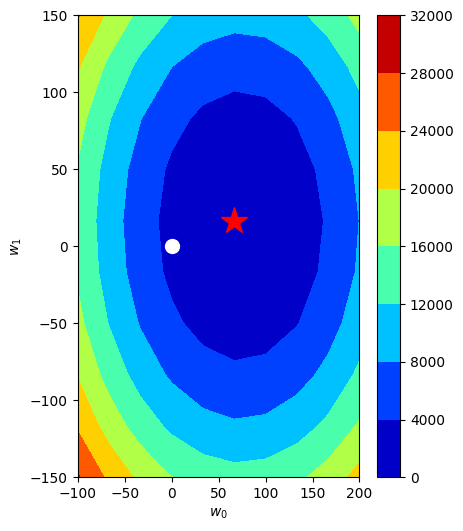

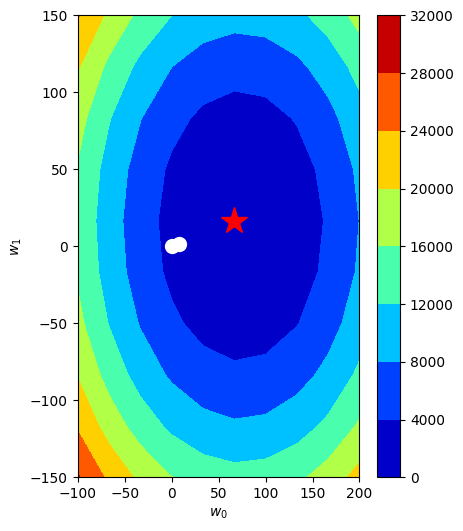

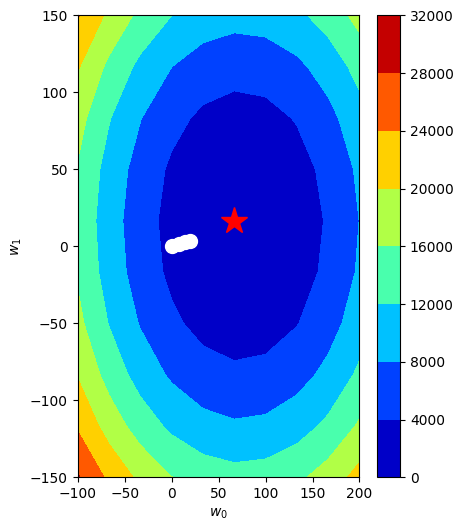

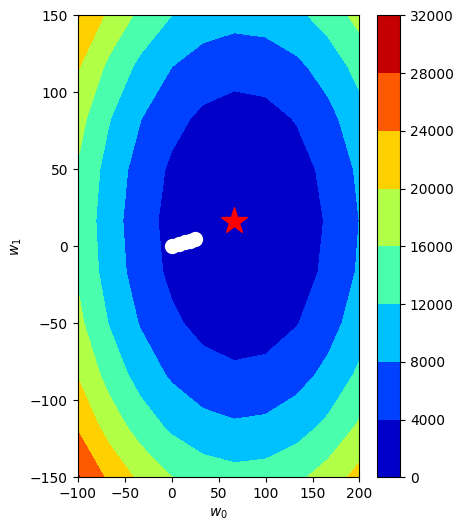

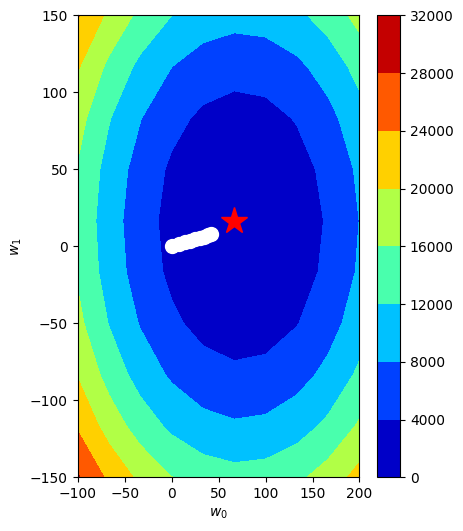

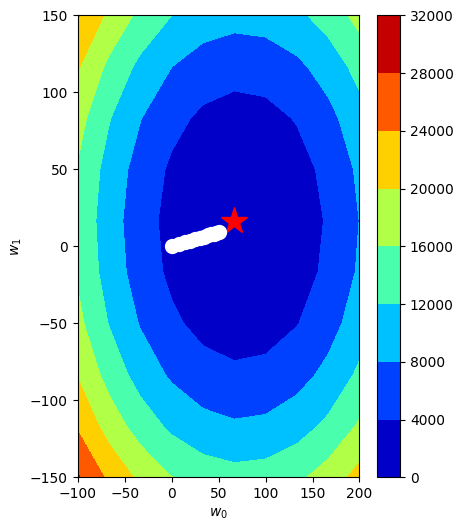

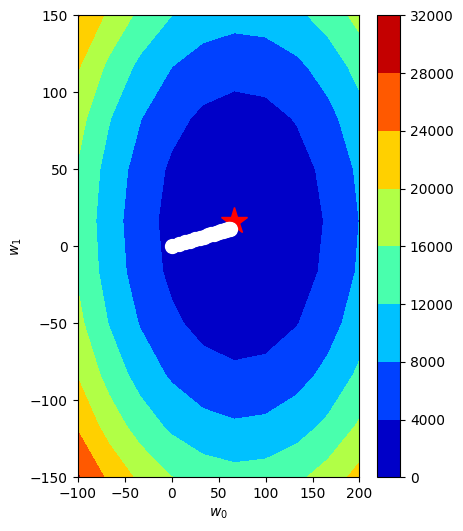

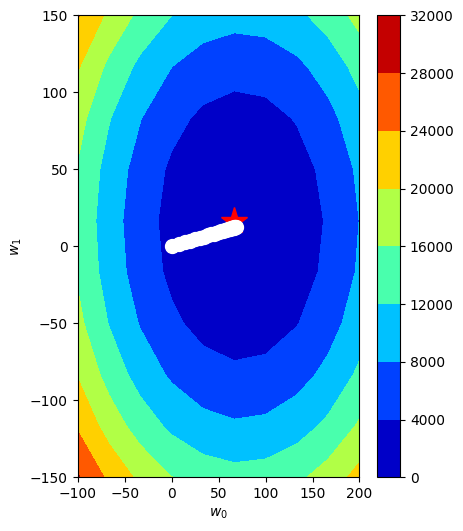

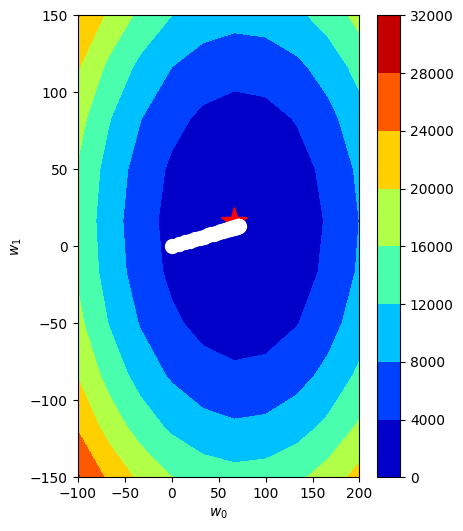

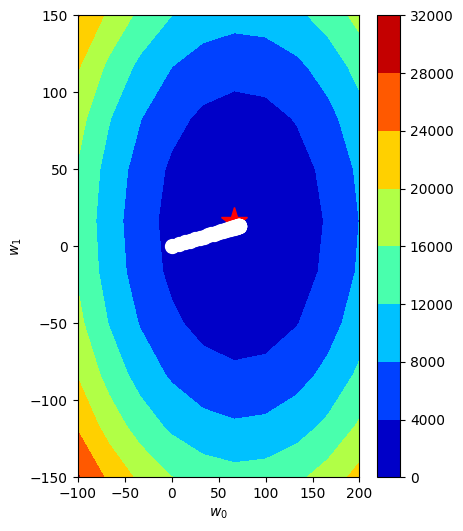

In [11]:
from ipywidgets import IntSlider, interact
from grid_search import *

def plot_figure(n_iter):
    # Generate grid data for visualization (parameters to be swept and best combination)
    grid_x0, grid_x1 = generate_w(num_intervals=10)
    grid_objectives = grid_search(b, A, grid_x0, grid_x1)
    obj_star, x0_star, x1_star = get_best_parameters(grid_x0, grid_x1, grid_objectives)

    fig = gradient_descent_visualization(
        gradient_objectives_naive, gradient_xs_naive, grid_objectives, grid_x0, grid_x1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_xs_naive)))

Try doing gradient descent with a better learning rate

In [12]:
# Define the parameters of the algorithm.
max_iters = 50

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: a better learning rate using the smoothness of f
# ***************************************************
gamma = 1/calculate_L(b, A)
# raise NotImplementedError

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_objectives, gradient_xs = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): objective=[-109.81967768  -73.68895452  -96.58434842 ...  -58.32779473  -74.38901745
  -51.59669261]
Gradient Descent(1/49): objective=[-10.3203658    8.06398145   3.83673268 ...   6.20852099   8.248026
   6.19949197]
Gradient Descent(2/49): objective=[-10.3203658    8.06398145   3.83673268 ...   6.20852099   8.248026
   6.19949197]
Gradient Descent(3/49): objective=[-10.3203658    8.06398145   3.83673268 ...   6.20852099   8.248026
   6.19949197]
Gradient Descent(4/49): objective=[-10.3203658    8.06398145   3.83673268 ...   6.20852099   8.248026
   6.19949197]
Gradient Descent(5/49): objective=[-10.3203658    8.06398145   3.83673268 ...   6.20852099   8.248026
   6.19949197]
Gradient Descent(6/49): objective=[-10.3203658    8.06398145   3.83673268 ...   6.20852099   8.248026
   6.19949197]
Gradient Descent(7/49): objective=[-10.3203658    8.06398145   3.83673268 ...   6.20852099   8.248026
   6.19949197]
Gradient Descent(8/49): objective=[-10.3203658    8.0639

Time visualization with a better learning rate

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

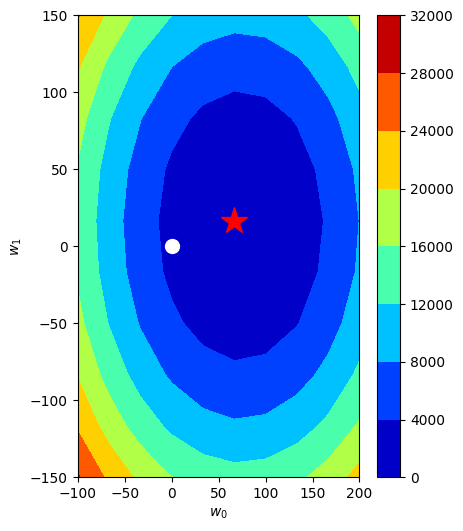

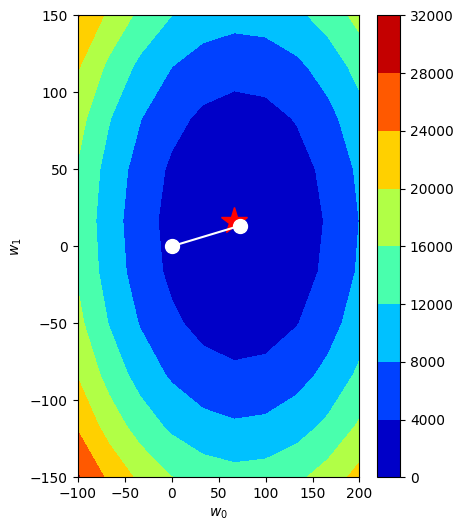

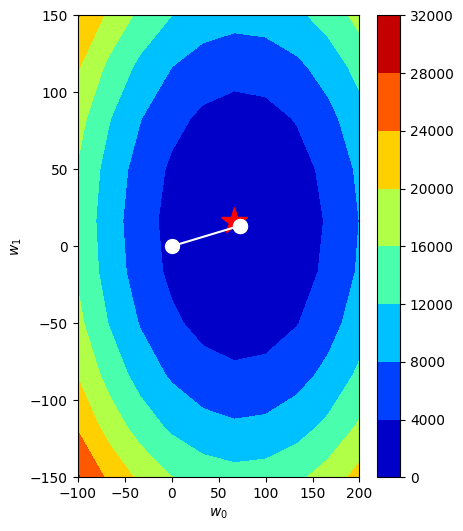

In [13]:
def plot_figure(n_iter):
    # Generate grid data for visualization (parameters to be swept and best combination)
    grid_x0, grid_x1 = generate_w(num_intervals=10)
    grid_objectives = grid_search(b, A, grid_x0, grid_x1)
    obj_star, x0_star, x1_star = get_best_parameters(grid_x0, grid_x1, grid_objectives)

    fig = gradient_descent_visualization(
        gradient_objectives, gradient_xs, grid_objectives, grid_x0, grid_x1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_xs)))

# Loading more complex data
The data is taken from https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

In [15]:
data = np.loadtxt("Concrete_Data.csv",delimiter=",")

A = data[:,:-1]
b = data[:,-1]
A, mean_A, std_A = standardize(A)

In [16]:
print('Number of samples n = ', b.shape[0])
print('Dimension of each sample d = ', A.shape[1])

Number of samples n =  1030
Dimension of each sample d =  8


# Running gradient descent

## Assuming bounded gradients
Assume we are moving in a bounded region $\|x\| \leq 25$ containing all iterates (and we assume $\|x-x^\star\| \leq 25$ as well, for simplicity). Then by $\nabla f(x) = \frac{1}{n}A^\top (Ax - b)$, one can see that $f$ is Lipschitz over that bounded region, with Lipschitz constant $\|\nabla f(x)\| \leq \frac{1}{n} (\|A^\top A\|\|x\| + \|A^\top b\|)$

In [27]:
# ***************************************************
# INSERT YOUR CODE HERE
# TODO: Compute the bound on the gradient norm
# ***************************************************
grad_norm_bound = (1/len(b)) * (np.linalg.norm(A.T @ A, 2)*25 + np.linalg.norm(A.T @ b, 2)) 
# raise NotImplementedError

Fill in the learning rate assuming bounded gradients

In [28]:
max_iters = 50

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: Compute learning rate based on bounded gradient
# ***************************************************
gamma =  1/grad_norm_bound
# raise NotImplementedError

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
bd_gradient_objectives, bd_gradient_xs = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()


# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

# Averaging the iterates as is the case for bounded gradients case
bd_gradient_objectives_averaged = []
for i in range(len(bd_gradient_xs)):
    if i > 0:
        bd_gradient_xs[i] = (i * bd_gradient_xs[i-1] + bd_gradient_xs[i])/(i + 1)
    grad, err = compute_gradient(b, A, bd_gradient_xs[i])
    obj = calculate_objective(err)
    bd_gradient_objectives_averaged.append(obj)

Gradient Descent(0/49): objective=[-79.99 -61.89 -40.27 ... -23.7  -32.77 -32.4 ]
Gradient Descent(1/49): objective=[-79.70236748 -61.60990173 -40.01886074 ... -23.86847148 -32.78936327
 -32.41016973]
Gradient Descent(2/49): objective=[-79.41983644 -61.3347286  -39.76992437 ... -24.03394723 -32.80844451
 -32.42056793]
Gradient Descent(3/49): objective=[-79.14231645 -61.06439405 -39.52319937 ... -24.19648026 -32.8272478
 -32.43118662]
Gradient Descent(4/49): objective=[-78.86971864 -60.798813   -39.27869287 ... -24.35612264 -32.84577723
 -32.44201794]
Gradient Descent(5/49): objective=[-78.60195563 -60.53790174 -39.03641065 ... -24.51292555 -32.86403688
 -32.45305427]
Gradient Descent(6/49): objective=[-78.33894152 -60.281578   -38.79635722 ... -24.66693924 -32.88203082
 -32.46428812]
Gradient Descent(7/49): objective=[-78.08059187 -60.02976088 -38.55853588 ... -24.81821313 -32.89976309
 -32.4757122 ]
Gradient Descent(8/49): objective=[-77.82682366 -59.78237083 -38.32294878 ... -24.9667

## Gradient descent using smoothness
Fill in the learning rate using smoothness of the function

In [34]:
max_iters = 50


# ***************************************************
# INSERT YOUR CODE HERE
# TODO: a better learning rate using the smoothness of f
# ***************************************************
gamma = 1/calculate_L(b, A)
# raise NotImplementedError

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_objectives, gradient_xs = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): objective=[-79.99 -61.89 -40.27 ... -23.7  -32.77 -32.4 ]
Gradient Descent(1/49): objective=[-71.0899815  -53.22310851 -32.49916779 ... -28.91289897 -33.36914465
 -32.71467494]
Gradient Descent(2/49): objective=[-67.07424738 -49.27168147 -26.83743115 ... -31.25761151 -33.69826039
 -33.24810553]
Gradient Descent(3/49): objective=[-65.26449179 -47.47166137 -23.53671834 ... -32.30425904 -33.87853359
 -33.76302969]
Gradient Descent(4/49): objective=[-64.38075577 -46.58273323 -21.57416361 ... -32.77565075 -34.0263787
 -34.18893908]
Gradient Descent(5/49): objective=[-63.88655119 -46.08155609 -20.39057752 ... -32.98709448 -34.18353137
 -34.52429392]
Gradient Descent(6/49): objective=[-63.55866751 -45.7484955  -19.66994421 ... -33.07791537 -34.35920405
 -34.78537741]
Gradient Descent(7/49): objective=[-63.30520596 -45.4920215  -19.2288157  ... -33.11098805 -34.55033165
 -34.98988889]
Gradient Descent(8/49): objective=[-63.08887268 -45.27431494 -18.95844706 ... -33.1155

## Plotting the Evolution of the Objective Function

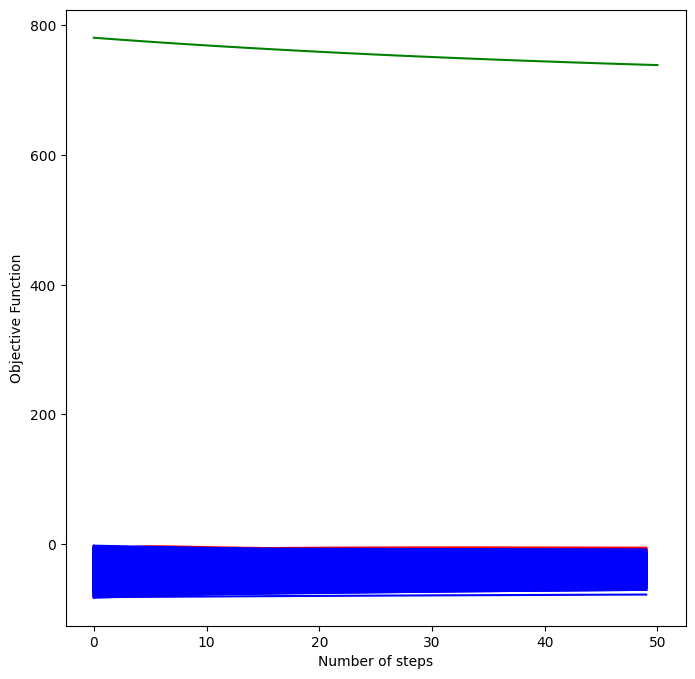

In [43]:
plt.figure(figsize=(8, 8))
plt.xlabel('Number of steps')
plt.ylabel('Objective Function')
#plt.yscale("log")
plt.plot(range(len(gradient_objectives)), gradient_objectives,'r', label='gradient descent with 1/L stepsize')
plt.plot(range(len(bd_gradient_objectives)), bd_gradient_objectives,'b', label='gradient descent assuming bounded gradients')
plt.plot(range(len(bd_gradient_objectives_averaged)), bd_gradient_objectives_averaged,'g', label='gradient descent assuming bounded gradients with averaged iterates')
# plt.legend(loc='upper right')
plt.show()